# **KNN & PCA | Assignment**

**Question 1:** What is K-Nearest Neighbors (KNN) and how does it work in both classification and regression problems?

**Answer:**

K-Nearest Neighbors (KNN) is a supervised machine learning algorithm that is used for both classification and regression problems. It is a non-parametric, instance-based (or lazy) learning method, meaning it doesn't make assumptions about the underlying data distribution and doesn't learn an explicit model during training.

**How KNN Works (General Idea):**
1. Store the Training Data: KNN doesn't train a model; it just stores the training data.
2. When Given a New Input:
  * It calculates the distance (commonly Euclidean distance) between the input and all training points.
  * It identifies the K nearest neighbors to the input point.
3. Make a Prediction:
  * For classification, it takes a majority vote among the K nearest neighbors.
  * For regression, it takes the average (or weighted average) of the target values of the K nearest neighbors.

**KNN for Classification**

**Example:**

You're classifying whether a fruit is an apple or an orange based on features like weight and color.
1. Choose K = 3.
2. Find the 3 nearest data points to the new fruit.
3. If 2 of them are labeled as apple and 1 as orange, the model predicts apple (majority class).

**Visual Representation:**

The new data point is surrounded by neighbors. The class with the most neighbors within the "K radius" is chosen.

**KNN for Regression**

**Example:**

You want to predict the price of a house based on its size and location.
1. Choose K = 5.
2. Find the 5 nearest neighbors based on these features.
3. Take the average house price of those 5 neighbors.
4. Predict that as the price for the new house.

**Pros**
* Simple to understand and implement.
* No training phase – useful when data changes frequently.
* Performs well on small datasets with low dimensions.

**Cons**
* Computationally expensive for large datasets (must compute distance to all points).
* Sensitive to irrelevant features and feature scales.
* Poor performance in high-dimensional spaces (curse of dimensionality).



**Question 2:** What is the Curse of Dimensionality and how does it affect KNN performance?

**Answer:**

The Curse of Dimensionality refers to various problems that arise when analyzing and organizing data in high-dimensional spaces (i.e., data with many features). As the number of dimensions increases, data becomes increasingly sparse, and many algorithms—including K-Nearest Neighbors (KNN)—start to perform poorly.

**How It Affects KNN**

KNN relies heavily on distance metrics (like Euclidean distance) to find the closest neighbors. In high-dimensional spaces, distances become less meaningful, and this impacts KNN in several key ways:

1. Distance Concentration
* In high dimensions, the difference between the nearest and farthest neighbor distances shrinks.
* All points become almost equidistant from each other.

**Implication for KNN:**

If you can’t reliably tell which points are closer, KNN’s ability to find "nearest" neighbors becomes ineffective.

2. Sparsity of Data
* As dimensions increase, the volume of the space increases exponentially.
* To maintain the same density of data points, you'd need an exponential increase in data.

**Implication for KNN:**

With finite data, most regions in high-dimensional space will be empty. So, KNN may struggle to find relevant neighbors, leading to overfitting or underfitting.

3. Increased Noise Sensitivity
* In high dimensions, irrelevant features (i.e., noisy features) dominate the distance calculations.

**Implication for KNN:**

KNN can be misled by these noisy features and assign higher importance to irrelevant neighbors.

**Question 3:** What is Principal Component Analysis (PCA)? How is it different from feature selection?

**Answer:**

Principal Component Analysis (PCA) is a dimensionality reduction technique used in data preprocessing. It transforms your data into a new coordinate system, reducing the number of features (dimensions) while preserving as much variance (information) as possible.

**How PCA Works (Step-by-Step Intuition):**
1. Start with your dataset, which has correlated features.
2. Compute the covariance matrix to see how features vary together.
3. Find the eigenvectors and eigenvalues of the covariance matrix.
4. Choose the top 'k' eigenvectors (called principal components) that explain the most variance.
5. Project the original data onto these components to get a new, lower-dimensional dataset.

**Key Properties of PCA:**
* Unsupervised: Doesn’t use target labels (i.e., it’s based only on input features).
* Creates new features: These are linear combinations of original features.
* Ordered by importance: The first principal component captures the most variance, the second captures the next most, and so on.

**Why Use PCA?**
* To reduce dimensionality and remove redundant (correlated) features.
* To speed up training of machine learning algorithms.
* To visualize high-dimensional data (e.g., reduce to 2D or 3D for plotting).
* To reduce noise and overfitting.

**Question 4:** What are eigenvalues and eigenvectors in PCA, and why are they important?

**Answer:**

In Principal Component Analysis (PCA), eigenvalues and eigenvectors come from linear algebra and are core to understanding how PCA works.

**Eigenvectors:**
* Think of them as directions in the feature space.
* In PCA, they represent the principal components, i.e., the new axes along which the data is most spread out.
* Each eigenvector points in a direction of maximum variance.

**Eigenvalues:**
* These are scalars associated with eigenvectors.
* They tell you how much variance (i.e., information) is captured by their corresponding eigenvectors.
* Larger eigenvalue = more important principal component.

| Concept          | Role in PCA                                                                 |
| ---------------- | --------------------------------------------------------------------------- |
| **Eigenvectors** | Define the **new feature space** (principal components).                    |
| **Eigenvalues**  | Quantify **how much information** (variance) is captured by each component. |


**Analogy**

Imagine spinning a cloud of data points and looking for the longest direction the data spreads. That direction is the first eigenvector. The length of spread in that direction is given by its eigenvalue.

**Question 5:** How do KNN and PCA complement each other when applied in a single pipeline?

**Answer:**

**The Roles of PCA and KNN**

| Component | Role                           | Purpose                                                      |
| --------- | ------------------------------ | ------------------------------------------------------------ |
| **PCA**   | Feature Transformation         | Reduces dimensionality, noise, and collinearity in the data. |
| **KNN**   | Classification (or Regression) | Classifies new points based on similarity to neighbors.      |

**PCA Helps KNN**
**1. Reduces Dimensionality**

* High-dimensional data can confuse KNN due to the curse of dimensionality.
* PCA compresses the data into a lower-dimensional space, improving distance calculation and efficiency.

**2. Removes Noise and Redundancy**
* KNN is sensitive to irrelevant features.
* PCA eliminates uninformative dimensions, helping KNN focus on what matters.

**3. Speeds Up Computation**
* KNN has to compute distances to all training points → slower with more features.
* PCA reduces feature count, so KNN runs faster.

**4. Improves Visualization and Interpretation**
* PCA transforms data to 2 or 3 dimensions → easier to visualize decision boundaries of KNN.
* Useful for exploring how well KNN is separating classes.

**Dataset:**

Use the Wine Dataset from sklearn.

**Question 6:** Train a KNN Classifier on the Wine dataset with and without feature scaling. Compare model accuracy in both cases.

(Include your Python code and output in the code box below.)

**Answer:**

In [ ]:
# Load Wine dataset
from sklearn.datasets import load_wine
wine = load_wine()
X, y = wine.data, wine.target

In [ ]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
# KNN without scaling
from sklearn.neighbors import KNeighborsClassifier
knn_no_scaling = KNeighborsClassifier(n_neighbors=5)
knn_no_scaling

KNeighborsClassifier()

In [ ]:
scores_no_scaling = cross_val_score(knn_no_scaling, X, y, cv=5)
scores_no_scaling

array([0.72222222, 0.66666667, 0.63888889, 0.65714286, 0.77142857])

In [ ]:
print(f"KNN Accuracy without scaling: {scores_no_scaling.mean():.4f}")

KNN Accuracy without scaling: 0.6913


In [ ]:
# KNN with scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [ ]:
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_with_scaling = KNeighborsClassifier(n_neighbors=5)
knn_with_scaling

KNeighborsClassifier()

In [ ]:
from sklearn.model_selection import cross_val_score
scores_with_scaling = cross_val_score(knn_with_scaling, X_scaled, y, cv=5)
scores_with_scaling

array([0.94444444, 0.94444444, 0.97222222, 1.        , 0.91428571])

In [ ]:
print(f"KNN Accuracy with scaling:    {scores_with_scaling.mean():.4f}")

KNN Accuracy with scaling:    0.9551


**Question 7:** Train a PCA model on the Wine dataset and print the explained variance ratio of each principal component.

(Include your Python code and output in the code box below.)

**Answer:**

In [ ]:
# Load the Wine dataset
import pandas as pd
from sklearn.datasets import load_wine
data = load_wine()
X = data.data
y = data.target

In [ ]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [ ]:
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [ ]:
# Apply PCA
from sklearn.decomposition import PCA
pca = PCA()
pca

PCA()

In [ ]:
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[ 3.31675081e+00,  1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00, -3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00,  1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00,  2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00,  2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00,  2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [ ]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [ ]:
# Print the explained variance ratio
for i, ratio in enumerate(explained_variance):
    print(f"Principal Component {i+1}: {ratio:.4f}")

Principal Component 1: 0.3620
Principal Component 2: 0.1921
Principal Component 3: 0.1112
Principal Component 4: 0.0707
Principal Component 5: 0.0656
Principal Component 6: 0.0494
Principal Component 7: 0.0424
Principal Component 8: 0.0268
Principal Component 9: 0.0222
Principal Component 10: 0.0193
Principal Component 11: 0.0174
Principal Component 12: 0.0130
Principal Component 13: 0.0080


**Question 8:** Train a KNN Classifier on the PCA-transformed dataset (retain top 2 components). Compare the accuracy with the original dataset.

(Include your Python code and output in the code box below.)

**Answer:**

In [ ]:
# Load the Wine dataset
from sklearn.datasets import load_wine
data = load_wine()
X = data.data
y = data.target

In [ ]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [ ]:
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [ ]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [ ]:
X_train

array([[ 0.60451647,  1.12535692, -0.64522928, ..., -0.64691063,
        -1.11821035, -0.53147054],
       [-0.6060432 , -0.54429654, -1.41285087, ...,  0.36217728,
         1.35356458, -0.23849711],
       [-0.82839089, -1.20856726, -1.5225111 , ...,  0.44992405,
        -0.42611337,  0.0098934 ],
       ...,
       [ 1.70390229, -0.4186237 ,  0.0492855 , ...,  1.06415147,
         0.54847218,  2.54793491],
       [-0.38369551, -0.72382916, -0.38935541, ...,  0.01119018,
        -0.77922407, -0.8021525 ],
       [-0.81603824,  0.10202093,  0.34171277, ..., -0.69078402,
         1.08520045, -0.98366865]])

In [ ]:
y_test

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2, 0, 1, 1, 2, 0, 1, 0, 0, 2])

In [ ]:
# KNN on original data
from sklearn.neighbors import KNeighborsClassifier
knn_original = KNeighborsClassifier(n_neighbors=5)
knn_original

KNeighborsClassifier()

In [ ]:
knn_original.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_original = knn_original.predict(X_test)
y_pred_original

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 2, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 0, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2, 0, 1, 1, 2, 0, 1, 0, 0, 2])

In [ ]:
from sklearn.metrics import accuracy_score
acc_original = accuracy_score(y_test, y_pred_original)
acc_original

0.9629629629629629

In [ ]:
# Apply PCA (retain top 2 components)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca

PCA(n_components=2)

In [ ]:
X_pca = pca.fit_transform(X_scaled)
X_train_pca, X_test_pca = train_test_split(X_pca, test_size=0.3, random_state=42)

In [ ]:
# KNN on PCA-transformed data
from sklearn.neighbors import KNeighborsClassifier
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca

KNeighborsClassifier()

In [ ]:
knn_pca.fit(X_train_pca, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_pca = knn_pca.predict(X_test_pca)
y_pred_pca

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 1, 1, 1, 1,
       2, 0, 1, 1, 2, 0, 1, 0, 0, 2])

In [ ]:
acc_pca = accuracy_score(y_test, y_pred_pca)
acc_pca

0.9814814814814815

In [ ]:
# Print accuracies
print(f"Accuracy on original dataset: {acc_original:.4f}")

Accuracy on original dataset: 0.9630


In [ ]:
print(f"Accuracy on PCA-transformed dataset (2 components): {acc_pca:.4f}")

Accuracy on PCA-transformed dataset (2 components): 0.9815


**Question 9:** Train a KNN Classifier with different distance metrics (euclidean, manhattan) on the scaled Wine dataset and compare the results.

(Include your Python code and output in the code box below.)

**Answer:**

In [ ]:
# Load the Wine dataset
from sklearn.datasets import load_wine
data = load_wine()
X = data.data
y = data.target

In [ ]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [ ]:
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [ ]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [ ]:
X_train

array([[ 0.60451647,  1.12535692, -0.64522928, ..., -0.64691063,
        -1.11821035, -0.53147054],
       [-0.6060432 , -0.54429654, -1.41285087, ...,  0.36217728,
         1.35356458, -0.23849711],
       [-0.82839089, -1.20856726, -1.5225111 , ...,  0.44992405,
        -0.42611337,  0.0098934 ],
       ...,
       [ 1.70390229, -0.4186237 ,  0.0492855 , ...,  1.06415147,
         0.54847218,  2.54793491],
       [-0.38369551, -0.72382916, -0.38935541, ...,  0.01119018,
        -0.77922407, -0.8021525 ],
       [-0.81603824,  0.10202093,  0.34171277, ..., -0.69078402,
         1.08520045, -0.98366865]])

In [ ]:
y_test

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2, 0, 1, 1, 2, 0, 1, 0, 0, 2])

In [ ]:
# KNN with Euclidean distance (default)
from sklearn.neighbors import KNeighborsClassifier
knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_euclidean

KNeighborsClassifier(metric='euclidean')

In [ ]:
knn_euclidean.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [ ]:
y_pred_euclidean = knn_euclidean.predict(X_test)
y_pred_euclidean

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 2, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 0, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2, 0, 1, 1, 2, 0, 1, 0, 0, 2])

In [ ]:
acc_euclidean = accuracy_score(y_test, y_pred_euclidean)
acc_euclidean

0.9629629629629629

In [ ]:
# KNN with Manhattan distance
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_manhattan

KNeighborsClassifier(metric='manhattan')

In [ ]:
knn_manhattan.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan')

In [ ]:
y_pred_manhattan = knn_manhattan.predict(X_test)
y_pred_manhattan

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 2, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 0, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2, 0, 1, 1, 2, 0, 1, 0, 0, 2])

In [ ]:
acc_manhattan = accuracy_score(y_test, y_pred_manhattan)
acc_manhattan

0.9629629629629629

In [ ]:
# Print accuracy results
print(f"Accuracy with Euclidean distance: {acc_euclidean:.4f}")

Accuracy with Euclidean distance: 0.9630


In [ ]:
print(f"Accuracy with Manhattan distance: {acc_manhattan:.4f}")

Accuracy with Manhattan distance: 0.9630


**Question 10:** You are working with a high-dimensional gene expression dataset to
classify patients with different types of cancer.

Due to the large number of features and a small number of samples, traditional models overfit.

Explain how you would:
* Use PCA to reduce dimensionality
* Decide how many components to keep
* Use KNN for classification post-dimensionality reduction
* Evaluate the model
* Justify this pipeline to your stakeholders as a robust solution for real-world biomedical data

(Include your Python code and output in the code box below.)

**Answer:**

In [ ]:
# Load dataset (simulate gene expression data)
import numpy as np
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X, y = data.data, data.target

In [ ]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [ ]:
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [ ]:
# Apply PCA
from sklearn.decomposition import PCA
pca = PCA()
pca

PCA()

In [ ]:
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[ 9.19283683e+00,  1.94858307e+00, -1.12316616e+00, ...,
         3.39144536e-02, -4.56477199e-02,  4.71692081e-02],
       [ 2.38780180e+00, -3.76817174e+00, -5.29292687e-01, ...,
        -3.26241827e-02,  5.68742432e-03,  1.86787626e-03],
       [ 5.73389628e+00, -1.07517380e+00, -5.51747593e-01, ...,
        -4.70258247e-02, -3.14589659e-03, -7.50534755e-04],
       ...,
       [ 1.25617928e+00, -1.90229671e+00,  5.62730526e-01, ...,
         2.57775589e-03, -6.70621179e-03, -3.77041667e-03],
       [ 1.03747941e+01,  1.67201011e+00, -1.87702933e+00, ...,
         6.80863833e-02,  8.41632764e-02,  2.37828222e-02],
       [-5.47524330e+00, -6.70636791e-01,  1.49044308e+00, ...,
         9.51587894e-03,  6.09131090e-02,  1.94755854e-02]])

In [ ]:
# Plot explained variance to decide how many components to keep
explained_variance = np.cumsum(pca.explained_variance_ratio_)
explained_variance

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])

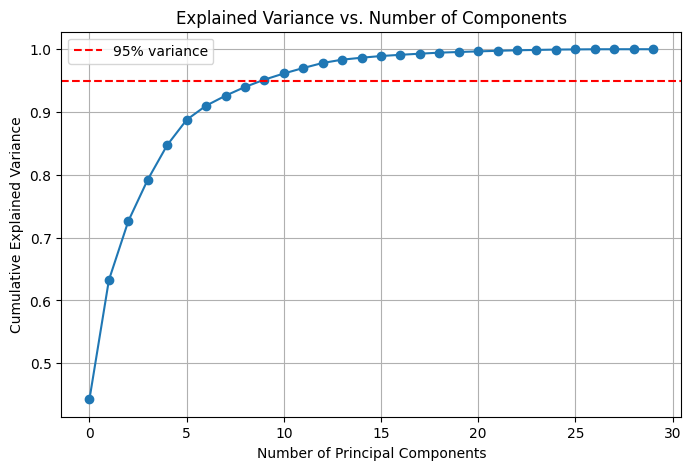

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(explained_variance, marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Number of Components")
plt.grid(True)
plt.axhline(0.95, color='red', linestyle='--', label='95% variance')
plt.legend()
plt.show()

In [ ]:
# Choose number of components to retain 95% variance
n_components = np.argmax(explained_variance >= 0.95) + 1
n_components

np.int64(10)

In [ ]:
print(f"Selected number of components: {n_components}")

Selected number of components: 10


In [ ]:
# Transform data with selected components
pca = PCA(n_components=n_components)
pca

PCA(n_components=np.int64(10))

In [ ]:
X_reduced = pca.fit_transform(X_scaled)
X_reduced

array([[ 9.19283683,  1.94858307, -1.12316616, ..., -0.39840723,
        -0.15711836, -0.87740188],
       [ 2.3878018 , -3.76817174, -0.52929269, ...,  0.24098846,
        -0.71190482,  1.10699494],
       [ 5.73389628, -1.0751738 , -0.55174759, ...,  0.09737374,
         0.02406564,  0.4542754 ],
       ...,
       [ 1.25617928, -1.90229671,  0.56273053, ...,  0.34188704,
         0.39391682,  0.52087738],
       [10.37479406,  1.67201011, -1.87702933, ..., -0.28023861,
        -0.54203454, -0.08929612],
       [-5.4752433 , -0.67063679,  1.49044308, ...,  1.04635352,
         0.37410111, -0.04772557]])

In [ ]:
# Train KNN and evaluate with cross-validation
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn

KNeighborsClassifier()

In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(knn, X_reduced, y, cv=5)

In [ ]:
cv_scores

array([0.96491228, 0.94736842, 0.98245614, 0.96491228, 0.94690265])

In [ ]:
print(f"KNN Cross-Validation Accuracy Scores: {cv_scores}")

KNN Cross-Validation Accuracy Scores: [0.96491228 0.94736842 0.98245614 0.96491228 0.94690265]


In [ ]:
print(f"Mean Accuracy: {cv_scores.mean():.4f}")

Mean Accuracy: 0.9613
